In [1]:
%autosave 0

Autosave disabled


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from adam_prepare import titanic_pipeline
from sklearn.model_selection import train_test_split

### Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [107]:
train, val, test = titanic_pipeline()
train.head()

,survived,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,0,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,0,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,1,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,0,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,0,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


In [108]:
def xy_split(df):
    return df.drop(columns = ['survived']), df.survived

In [109]:
X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)
X_train.head()

,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


In [110]:
k_value = 5
knn= KNeighborsClassifier(n_neighbors = k_value)

In [111]:

knn.fit(X_train, y_train)

KNeighborsClassifier()

###### My prediction is that the result will be overfitting

In [112]:
#make prediction
y_pred = knn.predict(X_train)
#estimate probability of survive using the train data
y_pred_proba = knn.predict_proba(X_train)

#### Evaluate your results using the model score, confusion matrix, and classification report.

In [113]:
knn.score(X_train, y_train), knn.score(X_val, y_val)  

(0.8073836276083467, 0.7014925373134329)

In [114]:
accuracy_difference = (knn.score(X_val, y_val)) -(knn.score(X_train, y_train))
abs(accuracy_difference)  
# by making all differences positive number, 
#i can see how far out they are from one another regardless of which way i subtract

0.10589109029491384

In [115]:
print(confusion_matrix(y_train, y_pred))

[[339  45]
 [ 75 164]]


### Confusion matrix legend on original data when k_value = 5
##### True Negatives  339 , False Positives  45
##### False Negatives   75, True Positives   164

True Positive Rate (Sensitivity or Recall):

Formula: True Positives / (True Positives + False Negatives)
Calculation: 164 / (164 + 75) = 0.6867

True Positive Rate (Sensitivity or Recall):

Formula: True Positives / (True Positives + False Negatives)
Calculation: 164 / (164 + 75) = 0.6867

True Negative Rate(Specificity)
Formula: True Negatives / (True Negatives + False Positives)
Calculation: 339 / (339 + 45) = 0.8824

False Negative Rate:

Formula: False Negatives / (False Negatives + True Positives)
Calculation: 75 / (75 + 164) = 0.3133

In [116]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       384
           1       0.78      0.69      0.73       239

    accuracy                           0.81       623
   macro avg       0.80      0.78      0.79       623
weighted avg       0.81      0.81      0.80       623





##### Run through steps 1-3 setting k to 10
with K being 10 the difference between val and train is 4 percent

##### Run through steps 1-3 setting k to 20
the difference now 1%, so k value of 20 produces a more desirable outcome

In [118]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_val, y_val)))


Accuracy of KNN classifier on test set: 0.70


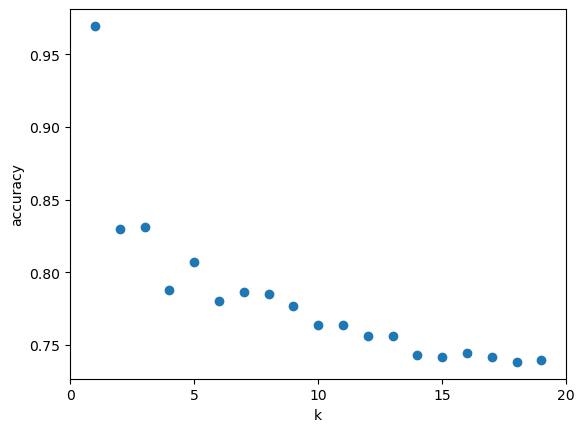

In [125]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_train, y_train))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()
